[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109]
(90, 96, 45)
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109]
51 49
5% I 0.12938457479079565
3% I 0.05312228389084339
1% I 0.01803060667589307
3.3% I 0.03059943827490012
2% I 0.015497625288036134
0% I 0.007203260902315378


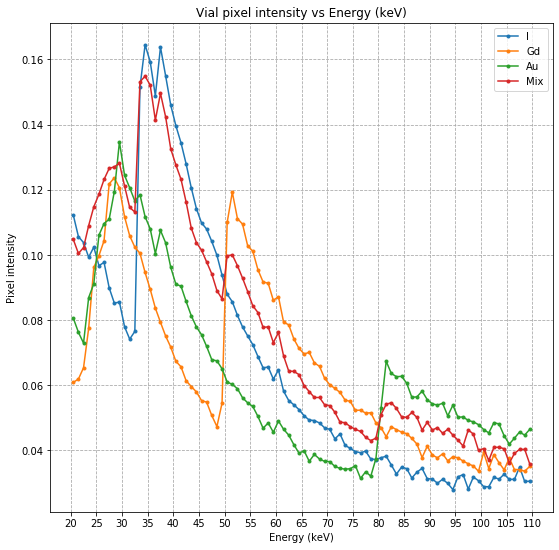

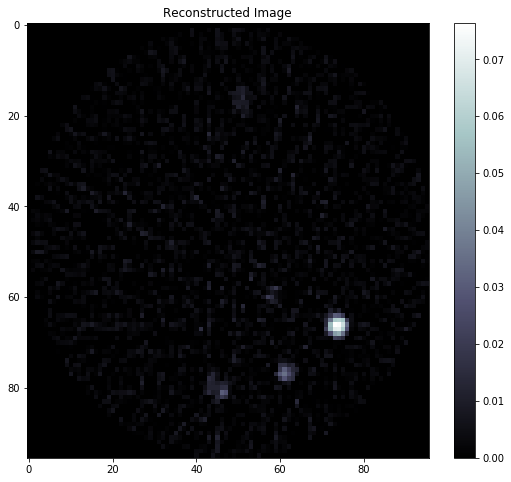

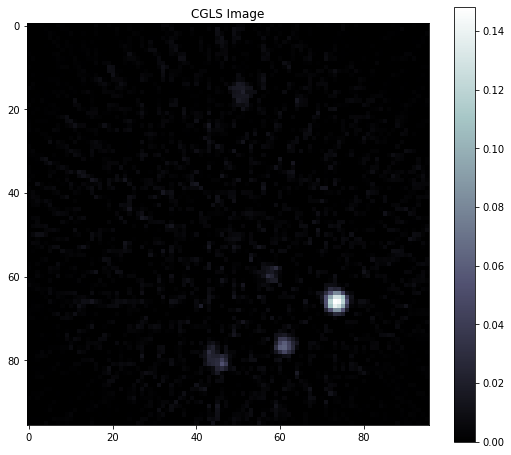

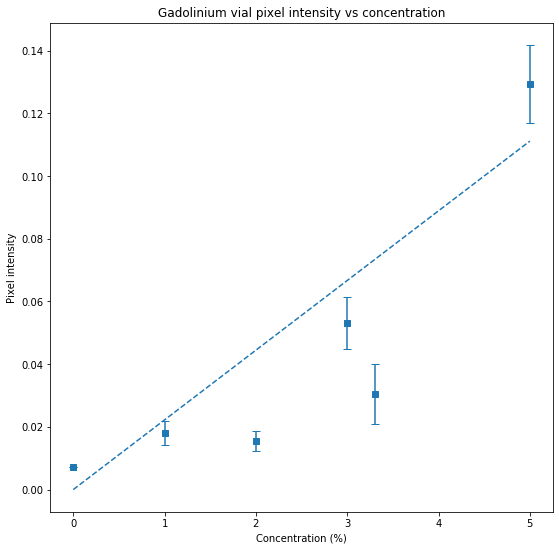

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra
%matplotlib inline
bin_width=1
bins=np.arange(20,110,bin_width)
print(bins)
airscan_counts1 = [sum(genfromtxt("Desktop/CT imaging/30-6-2021/airscan.mca", skip_header=int(round(i*550/81+16)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in bins] 
airscan_counts2= [sum(genfromtxt("Desktop/CT imaging/30-6-2021/angle_128_acq_01.mca", skip_header=int(round(i*550/81+16)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in bins]
master_counts=[]
tot_counts=[]
avg_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(0,360,8):
        for j in np.arange(1,97):
            counts = genfromtxt("Desktop/CT imaging/30-6-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=int(round(bins[k]*550/81+16)),max_rows=int(round(bin_width*550/81)))
            if i <=120:
                avg_counts.append(-np.log(sum(counts)/int(round(bin_width*550/81))/airscan_counts1[k]))
                counts=0
            else:
                avg_counts.append(-np.log(sum(counts)/int(round(bin_width*550/81))/airscan_counts2[k]))
                counts=0
        tot_counts.append(avg_counts)
        avg_counts=[]
    master_counts.append(tot_counts)
    tot_counts=[]
for i in np.arange(0,len(master_counts)):
    master_counts[i][4].pop()
    master_counts[i][4].insert(0,0)
    master_counts[i][38].pop()
    master_counts[i][38].insert(0,0)
    
master_counts=np.array(master_counts)
master_counts=[np.transpose(x) for x in master_counts]
print(np.shape(master_counts))
theta=np.arange(0,360,8)
print(bins)

images=[]
for i in np.arange(0,len(bins)):
    images.append(iradon(master_counts[i],theta=theta))
    images[i][images[i]<0]=0


coords1=[ [16., 45.], [16., 44.] ,[15., 44.], [17. ,44.], [17., 45.],[17., 46.], [16. ,46.] ,[15. ,46.], [15., 45.]]
coords2=[[21., 29.], [22. ,29.], [21., 30.], [22., 30.]]
coords3=[[32. ,47.], [32., 46.], [33., 47.] ,[33. ,46.]]
coords4=[[73., 65.], [74., 65.] ,[73., 66.], [74., 66.], [75. ,66.], [73. ,67.], [74., 67.], [72. ,67.], [72., 66.]]
coords5= [[61., 76.], [62., 76.], [62., 77.] ,[61., 77.]] 
coords6=[[59., 60.],[58., 60.], [58., 61.], [59., 61.]]
coords7=[[76., 33.] ,[77., 33.] ,[76., 34.], [77., 34.],[76. ,35.] ,[77. ,35.] ,[75., 34.] ,[78. ,34.],[75., 35.]]
coords8=[[66., 22.] ,[67., 22.] , [66. ,23.] ,[67. ,23.]]
coords9=[ [60., 37.], [60., 38.], [61., 38.], [61., 37.]]
coords10=[[45. ,80.] ,[45., 79.], [46., 79.] ,[46., 80.], [45., 81.], [46., 81.], [44., 81.], [44., 80.] ,[44., 79.]]
coords11=[[50., 16.], [51., 16.], [52., 16.], [50., 17.], [51., 17.],[52., 17.], [50. ,15.], [51., 15.] ,[52. ,15.]]
coords12=[[34,20],[34,19],[35,19],[35,20]]
mask=np.zeros(shape=(96,96))
for x,y in coords1:
    mask[int(y)][int(x)]=1
vial1=mask*images
vial1[vial1==0]=np.nan
vial1_mean=[np.nanmean(i) for i in vial1]

mask=np.zeros(shape=(96,96))
for x,y in coords4:
    mask[int(y)][int(x)]=1
vial2=mask*images
vial2[vial2==0]=np.nan
vial2_mean=[np.nanmean(i) for i in vial2]

mask=np.zeros(shape=(96,96))
for x,y in coords7:
    mask[int(y)][int(x)]=1
vial3=mask*images
vial3[vial3==0]=np.nan
vial3_mean=[np.nanmean(i) for i in vial3]

mask=np.zeros(shape=(96,96))
for x,y in coords10:
    mask[int(y)][int(x)]=1
vial4=mask*images
vial4[vial4==0]=np.nan
vial4_mean=[np.nanmean(i) for i in vial4]

#intensity of vials vs energy
figure(1,figsize=(9,9))
plt.plot(bins+bin_width/2,vial1_mean,marker='.',label='I')
plt.plot(bins+bin_width/2,vial2_mean,marker='.',label='Gd')
plt.plot(bins+bin_width/2,vial3_mean,marker='.',label='Au')
plt.plot(bins+bin_width/2,vial4_mean,marker='.',label='Mix')
plt.title('Vial pixel intensity vs Energy (keV)')
plt.grid(linestyle='--',c='darkgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Pixel intensity') 
plt.locator_params(axis="x", nbins=30)
plt.legend()


subtraction=master_counts[31]-master_counts[29]
print(bins[31],bins[29])
image=iradon(subtraction,theta=theta)
image[image<0] = 0

figure(2,figsize=(9,8))
plt.imshow(image,aspect='auto',cmap='bone')
plt.colorbar()
plt.title('Reconstructed Image')


#create geometries and projector
proj_geom = astra.create_proj_geom('parallel', 1,96, np.arange(0,2*np.pi,2*np.pi/45));
vol_geom = astra.create_vol_geom(96,96);
sinogram = astra.data2d.create('-sino',proj_geom,np.transpose(subtraction));
recon_id = astra.data2d.create('-vol', vol_geom,data=iradon(subtraction,theta=theta))
proj_id= astra.create_projector('line',proj_geom,vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('CGLS')
cfg['ReconstructionDataId'] = recon_id
cfg['ProjectionDataId'] = sinogram
cfg['ProjectorId']=proj_id
# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id,5)

# Get the result
rec3 = astra.data2d.get(recon_id)
rec3[rec3<0] = 0

figure(3,figsize=(9,8))
plt.imshow(rec3,cmap='bone')
plt.colorbar()
plt.title('CGLS Image')

mask=np.zeros(shape=(96,96))
for x,y in coords4:
    mask[int(y)][int(x)]=1
vial1=mask*rec3
vial1[vial1==0]=np.nan
vial1_mean=np.nanmean(vial1)
vial1_std=np.nanstd(vial1)
print('5% I', vial1_mean)

mask=np.zeros(shape=(96,96))
for x,y in coords5:
    mask[int(y)][int(x)]=1
vial2=mask*rec3
vial2[vial2==0]=np.nan
vial2_mean=np.nanmean(vial2)
vial2_std=np.nanstd(vial2)
print('3% I', vial2_mean)

mask=np.zeros(shape=(96,96))
for x,y in coords6:
    mask[int(y)][int(x)]=1
vial3=mask*rec3
vial3[vial3==0]=np.nan
vial3_mean=np.nanmean(vial3)
vial3_std=np.nanstd(vial3)
print('1% I', vial3_mean)


mask=np.zeros(shape=(96,96))
for x,y in coords10:
    mask[int(y)][int(x)]=1
vial4=mask*rec3
vial4[vial4==0]=np.nan
vial4_mean=np.nanmean(vial4)
vial4_std=np.nanstd(vial4)
print('3.3% I', vial4_mean)

mask=np.zeros(shape=(96,96))
for x,y in coords11:
    mask[int(y)][int(x)]=1
vial5=mask*rec3
vial5[vial5==0]=np.nan
vial5_mean=np.nanmean(vial5)
vial5_std=np.nanstd(vial5)
print('2% I', vial5_mean)

mask=np.zeros(shape=(96,96))
for x,y in coords12:
    mask[int(y)][int(x)]=1
vial6=mask*rec3
if (vial6==0).all()==False:
    vial6[vial6==0]=np.nan
    vial6_mean=np.nanmean(vial6)
    vial6_std=np.nanstd(vial6)
else:
    vial6_mean=0
    vial6_std=0
print('0% I', vial6_mean)


vialmeans=[]
vialmeans.append(vial6_mean)
vialmeans.append(vial3_mean)
vialmeans.append(vial5_mean)
vialmeans.append(vial2_mean)
vialmeans.append(vial4_mean)
vialmeans.append(vial1_mean)
conc=np.array([5,3,1,3.3,2,0])
conc=sorted(conc)
conc=np.array(conc)
error=[vial6_std,vial3_std,vial5_std,vial2_std,vial4_std,vial1_std]

m, b = np.polyfit(conc, vialmeans, 1)
figure(5,figsize=(9,9))
plt.errorbar(conc,vialmeans,marker='s',yerr=error,capsize=4,linestyle='')
plt.plot(conc,m*conc,c='#1f77b4',linestyle='--')
plt.title('Gadolinium vial pixel intensity vs concentration')
plt.xlabel('Concentration (%)')
plt.ylabel('Pixel intensity')
# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(recon_id)
astra.projector.delete(proj_id)

